In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [6]:
data=pd.read_csv('weight-height.csv')

In [7]:
data.head()

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


In [40]:
data.shape

(10000, 3)

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Gender  10000 non-null  object 
 1   Height  10000 non-null  float64
 2   Weight  10000 non-null  float64
dtypes: float64(2), object(1)
memory usage: 234.5+ KB


In [9]:
data.describe()

,Height,Weight
count,10000.000000,10000.000000
mean,66.367560,161.440357
std,3.847528,32.108439
min,54.263133,64.700127
25%,63.505620,135.818051
50%,66.318070,161.212928
75%,69.174262,187.169525
max,78.998742,269.989699


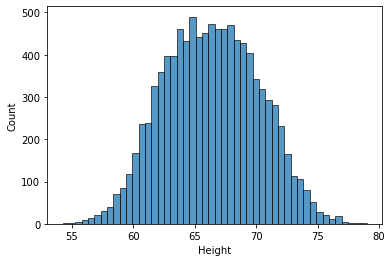

In [11]:
sns.histplot(data=data,x='Height')
plt.show()

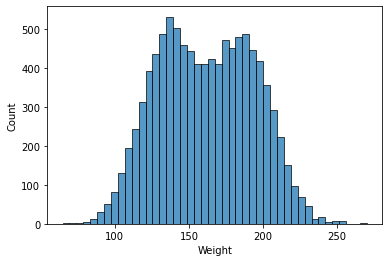

In [12]:
sns.histplot(data=data,x='Weight')
plt.show()

<AxesSubplot:xlabel='Height'>

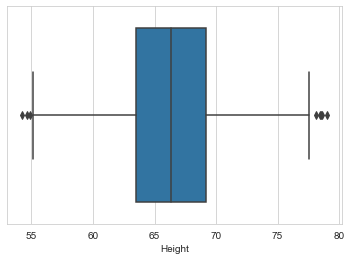

In [27]:

sns.set_style('whitegrid')
sns.boxplot(x=data.Height)


<AxesSubplot:xlabel='Weight'>

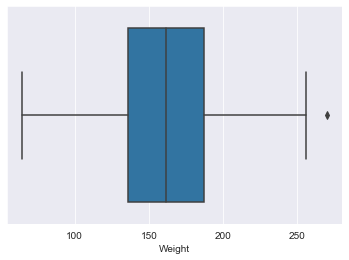

In [28]:
sns.set_style('darkgrid')
sns.boxplot(x=data.Weight)

In [29]:
height_q1=data.Height.quantile(0.25)
height_q3=data.Height.quantile(0.75)
height_q1,height_q3

(63.505620481218955, 69.1742617268347)

In [30]:
iqr=height_q3-height_q1
iqr

5.668641245615746

In [31]:
lh=height_q1-1.5*iqr
uh=height_q3+1.5*iqr

lh,uh

(55.00265861279534, 77.67722359525831)

In [32]:
Weight_q1=data.Weight.quantile(0.25)
Weight_q3=data.Weight.quantile(0.75)
Weight_q1,Weight_q3

(135.8180513055015, 187.16952486868348)

In [33]:
iqr_w=Weight_q3-Weight_q1
iqr_w

51.35147356318197

In [34]:
lW=Weight_q1-1.5*iqr
uW=Weight_q3+1.5*iqr

lW,uW

(127.31508943707789, 195.6724867371071)

In [35]:
df=data.copy()

In [49]:
df[(df.Height<lh) | (df.Height>uh)]

,Gender,Height,Weight
994,Male,78.095867,255.690835
1317,Male,78.462053,227.342565
2014,Male,78.998742,269.989699
3285,Male,78.528210,253.889004
3757,Male,78.621374,245.733783
6624,Female,54.616858,71.393749
7294,Female,54.873728,78.606670
9285,Female,54.263133,64.700127


In [50]:
df[(df.Weight<lW) | (df.Weight>uW)]

,Gender,Height,Weight
0,Male,73.847017,241.893563
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801
11,Male,71.640805,213.741169
...,...,...,...
9989,Female,60.955084,95.686674
9991,Female,62.636675,102.853563
9993,Female,60.030434,97.687432
9994,Female,59.098250,110.529686


In [42]:
df_without_outliers=df[(df.Height>lh) & (df.Height<uh)]
df_without_outliers

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801
...,...,...,...
9995,Female,66.172652,136.777454
9996,Female,67.067155,170.867906
9997,Female,63.867992,128.475319
9998,Female,69.034243,163.852461


In [45]:
df_without_outliers=df_without_outliers[(df.Weight>lW) & (df.Weight<uW)].reset_index()

<ipython-input-45-5d38f86ccd60>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_without_outliers=df_without_outliers[(df.Weight>lW) & (df.Weight<uW)].reset_index()


In [46]:
df_without_outliers

,index,Gender,Height,Weight
0,1,Male,68.781904,162.310473
1,5,Male,67.253016,152.212156
2,6,Male,68.785081,183.927889
3,7,Male,68.348516,167.971110
4,8,Male,67.018950,175.929440
...,...,...,...,...
6676,9992,Female,62.077832,138.691680
6677,9995,Female,66.172652,136.777454
6678,9996,Female,67.067155,170.867906
6679,9997,Female,63.867992,128.475319


<AxesSubplot:xlabel='Weight'>

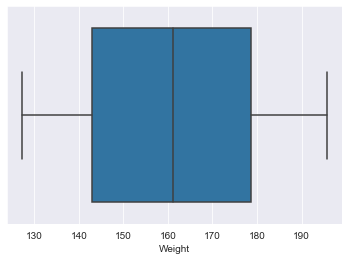

In [47]:
sns.set_style('darkgrid')
sns.boxplot(x=df_without_outliers.Weight)

<AxesSubplot:xlabel='Height'>

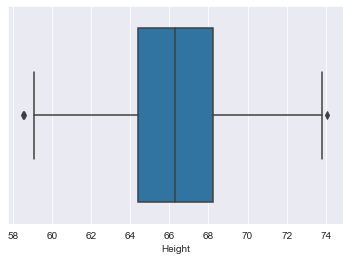

In [48]:
sns.set_style('darkgrid')
sns.boxplot(x=df_without_outliers.Height)

In [52]:
import datetime

In [54]:
df_date=datetime.datetime.today()

In [56]:
df_datelist=[df_date - datetime.timedelta(days=x) for x in range(0,20) ]

In [61]:
date=pd.DataFrame(df_datelist)
date.columns=['days']

In [62]:
date

,days
0,2021-06-29 18:20:53.284614
1,2021-06-28 18:20:53.284614
2,2021-06-27 18:20:53.284614
3,2021-06-26 18:20:53.284614
4,2021-06-25 18:20:53.284614
5,2021-06-24 18:20:53.284614
6,2021-06-23 18:20:53.284614
7,2021-06-22 18:20:53.284614
8,2021-06-21 18:20:53.284614
9,2021-06-20 18:20:53.284614


In [113]:
date['month']=date['days'].dt.month

date['day_of_the_week']=date['days'].dt.weekday

date['year']=date['days'].dt.year

date['time']=date['days'].dt.time

In [114]:
date

,days,month,day_of_the_week,year,time
0,2021-06-29 18:20:53.284614,6,1,2021,18:20:53.284614
1,2021-06-28 18:20:53.284614,6,0,2021,18:20:53.284614
2,2021-06-27 18:20:53.284614,6,6,2021,18:20:53.284614
3,2021-06-26 18:20:53.284614,6,5,2021,18:20:53.284614
4,2021-06-25 18:20:53.284614,6,4,2021,18:20:53.284614
5,2021-06-24 18:20:53.284614,6,3,2021,18:20:53.284614
6,2021-06-23 18:20:53.284614,6,2,2021,18:20:53.284614
7,2021-06-22 18:20:53.284614,6,1,2021,18:20:53.284614
8,2021-06-21 18:20:53.284614,6,0,2021,18:20:53.284614
9,2021-06-20 18:20:53.284614,6,6,2021,18:20:53.284614


In [145]:
money={'inr':[1,2,3,4,5],
      'usd':[75,150,225,300,375],
      'reg':['gautam@gmail9','prabhu@rediff','gsp@yahoo','gsprabhu@hotmail','190953336@manipal']}

In [146]:
m=pd.DataFrame(money)

In [147]:
m

,inr,usd,reg
0,1,75,gautam@gmail
1,2,150,prabhu@rediff
2,3,225,gsp@yahoo
3,4,300,gsprabhu@hotmail
4,5,375,190953336@manipal


In [148]:
m['email']=m['reg'].apply(lambda x: x.split('@')[1])

In [149]:
m

,inr,usd,reg,email
0,1,75,gautam@gmail,gmail
1,2,150,prabhu@rediff,rediff
2,3,225,gsp@yahoo,yahoo
3,4,300,gsprabhu@hotmail,hotmail
4,5,375,190953336@manipal,manipal


In [120]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import StandardScaler

In [131]:
m1=m.copy()
m1=StandardScaler().fit_transform(m)

In [132]:
m1

array([[-1.41421356, -1.41421356],
       [-0.70710678, -0.70710678],
       [ 0.        ,  0.        ],
       [ 0.70710678,  0.70710678],
       [ 1.41421356,  1.41421356]])

In [133]:
m2=RobustScaler().fit_transform(m)

In [134]:
m2

array([[-1. , -1. ],
       [-0.5, -0.5],
       [ 0. ,  0. ],
       [ 0.5,  0.5],
       [ 1. ,  1. ]])

In [135]:
m3=MinMaxScaler().fit_transform(m)

In [136]:
m3

array([[0.  , 0.  ],
       [0.25, 0.25],
       [0.5 , 0.5 ],
       [0.75, 0.75],
       [1.  , 1.  ]])

In [151]:
print('gauta,')

gauta,


In [154]:
import tensorflow
from tensorflow import keras
